<a href="https://colab.research.google.com/github/oakfr/fast-ai-training/blob/main/lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
ims = search_images_ddg('grizzly bear')
len(ims)

200

In [4]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

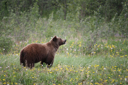

In [5]:
im = Image.open(dest)
im.to_thumb(128,128)

In [6]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [7]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        print(results[0])
        download_images(dest, urls=results)

http://mediad.publicbroadcasting.net/p/kufm/files/styles/x_large/public/201512/grizzly-bear_02-PD.jpg
https://churchillwild.com/wp-content/uploads/2021/04/Black-Bear-Cheryl-Hnatiuk.jpg
https://cdna.4imprint.com/prod/700/490546.jpg


In [8]:
fns = get_image_files(path)
fns

(#570) [Path('bears/black/82625e99-62d6-4311-ba57-ccc479b9dac2.jpg'),Path('bears/black/e553764b-9ca3-4317-982a-0c3e81121ee7.jpg'),Path('bears/black/b59304dd-ea63-4731-8926-51ee9f30709d.jpg'),Path('bears/black/8d0e61e7-4c6d-4d57-9df8-e3890489c91e.jpg'),Path('bears/black/9a8c24e8-a8d2-473c-a5d0-5ac08b2d2825.JPG'),Path('bears/black/134353d1-2d2f-4b18-90e6-f3efe40f69bf.jpg'),Path('bears/black/ea4422ce-9af0-4bd8-8aee-2b891b6a946a.jpg'),Path('bears/black/cefc1714-9ff8-405c-a7c0-b1aed0095707.jpg'),Path('bears/black/73260069-1630-404f-92e2-1489a78efd57.jpg'),Path('bears/black/474af8cf-de5b-43ff-94c5-5badaac3bfa4.jpg')...]

In [9]:
failed = verify_images(fns)
failed
     

(#25) [Path('bears/black/590e785b-2530-4a08-8787-c69e39945f61.jpg'),Path('bears/black/22795ffa-de2c-46f9-8cd8-19b4c0b49976.jpg'),Path('bears/grizzly/0f9f265d-27db-4b39-813a-2f55bb8e56f3.jpg'),Path('bears/grizzly/924e6115-6646-4361-aa2b-f1e666ee2174.jpeg'),Path('bears/grizzly/aa9e40a7-c3cf-4a6d-a1c3-bb080225f806.jpg'),Path('bears/grizzly/78e0d876-2dc1-4f15-a711-59aa27b5cad9.jpg'),Path('bears/grizzly/41371155-eaf1-482e-91e5-2468bc8dc782.jpg'),Path('bears/grizzly/db8f0ff3-3837-42cc-9bfc-1fbe1130ccdd.jpg'),Path('bears/teddy/130d6d27-bff0-481d-a8dc-dec1ba1b7ef9.jpg'),Path('bears/teddy/604e3bc4-b978-4252-a1ce-a0a768f84e05.JPG')...]

In [10]:
failed.map(Path.unlink);

In [22]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [23]:
dls = bears.dataloaders(path)

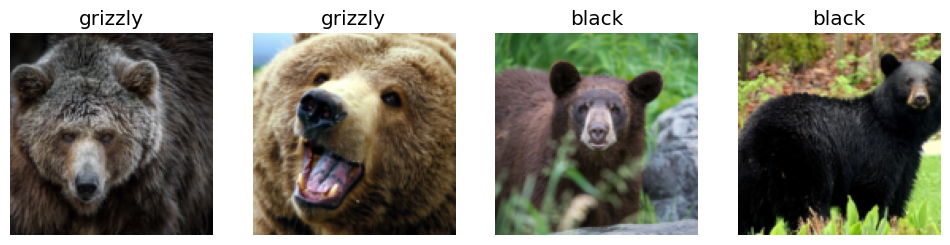

In [24]:
dls.valid.show_batch(max_n=4, nrows=1)

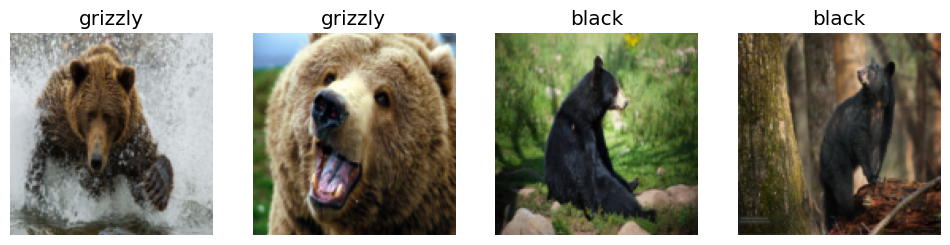

In [14]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

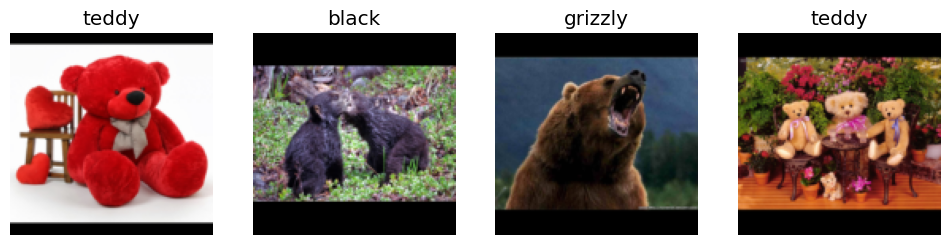

In [30]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

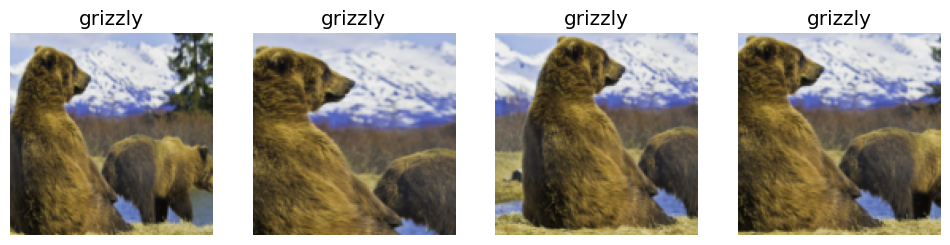

In [31]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

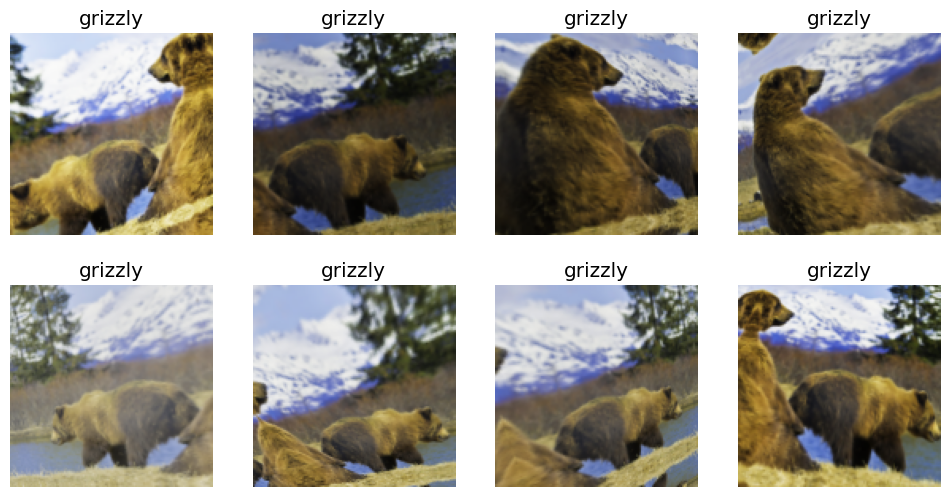

In [32]:

bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [15]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [16]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 200MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.555022,0.087874,0.036697,00:28


epoch,train_loss,valid_loss,error_rate,time
0,0.228280,0.078599,0.018349,00:26
1,0.189737,0.085710,0.027523,00:27
2,0.152276,0.100976,0.036697,00:33
3,0.121757,0.109040,0.036697,00:27


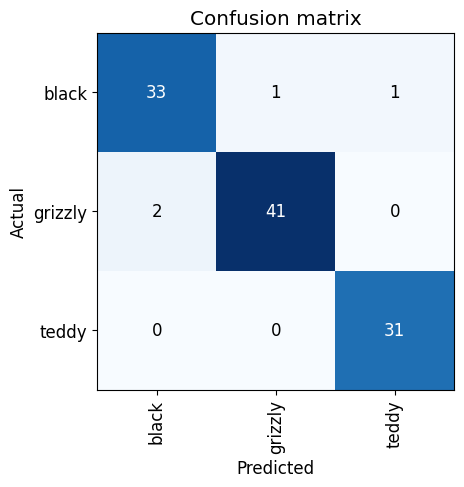

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
     

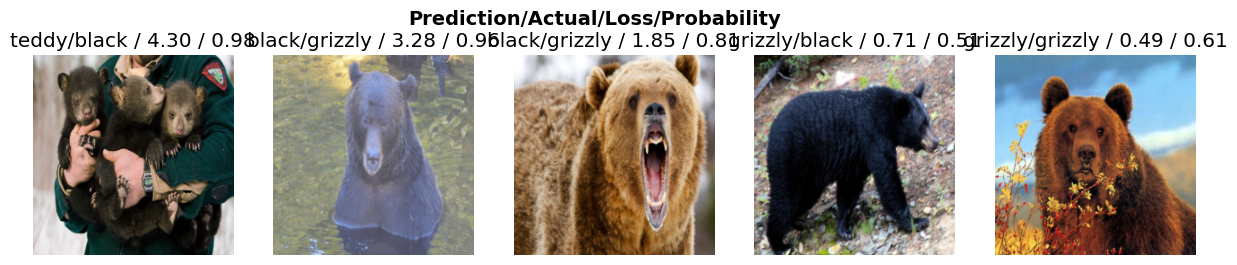

In [18]:
interp.plot_top_losses(5, nrows=1)

In [21]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

FileNotFoundError: ignored

In [20]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [25]:
learn.export()

In [27]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [28]:
learn_inf = load_learner(path/'export.pkl')

In [29]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([7.0135e-05, 9.9990e-01, 3.2178e-05]))

In [30]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [31]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}


In [34]:
#!pip install gradio
import gradio as gr
gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(512, 512)), outputs=gr.outputs.Label(num_top_classes=3)).launch(share=True)


/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://35019cc4b5f74fc30e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


ReadTimeout: ignored

In [35]:
git clone https://huggingface.co/spaces/olivierkoch/minimal

SyntaxError: ignored

In [36]:
!git clone https://huggingface.co/spaces/olivierkoch/minimal

Cloning into 'minimal'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), 639 bytes | 127.00 KiB/s, done.


In [37]:
!git add ./export.pkl

fatal: not a git repository (or any of the parent directories): .git


In [38]:
!cd minimal

In [39]:
!cp ../export.pkl .

cp: cannot stat '../export.pkl': No such file or directory


In [40]:
!ls ..

bin	 dev   lib32   mnt			 python-apt  srv    usr
boot	 etc   lib64   NGC-DL-CONTAINER-LICENSE  root	     sys    var
content  home  libx32  opt			 run	     tmp
datalab  lib   media   proc			 sbin	     tools


In [41]:
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [42]:
path.pwd()

AttributeError: ignored

In [43]:
!ls /home

In [44]:
!ls /python-apt

apt	    COPYING.GPL  Dockerfile    python_apt.egg-info  tests
aptsources  data	 po	       README.md	    TODO
AUTHORS     debian	 pre-build.sh  setup.cfg	    typehinting
build	    doc		 python        setup.py		    utils


In [45]:
!ls content

ls: cannot access 'content': No such file or directory


In [46]:
!pwd

/content


In [47]:
!ls /content

bears  export.pkl  flagged  gdrive  images  minimal  sample_data


In [48]:
!cd minimal

In [49]:
!cp /content/export.pkl .

cp: '/content/export.pkl' and './export.pkl' are the same file


In [50]:
!gid add export.pkl

/bin/bash: gid: command not found


In [51]:
!git add export.pkl

fatal: not a git repository (or any of the parent directories): .git


In [52]:
!cd minimal

In [53]:
!pwd

/content


In [54]:
!ls

bears  export.pkl  flagged  gdrive  images  minimal  sample_data
